# Reinforcement Learning

Most of you have probably heard of AI learning to play computer games on their own, a very popular example being Deepmind. Deepmind hit the news when their AlphaGo program defeated the South Korean Go world champion in 2016. There had been many successful attempts in the past to develop agents with the intent of playing Atari games like Breakout, Pong, and Space Invaders.

Each of these programs follow a paradigm of Machine Learning known as Reinforcement Learning. If you've never been exposed to reinforcement learning before, the following is a very straightforward analogy for how it works.

## Reinforcement Learning Analogy
Consider the scenario of teaching a dog new tricks. The dog doesn't understand our language, so we can't tell him what to do. Instead, we follow a different strategy. We emulate a situation (or a cue), and the dog tries to respond in many different ways. If the dog's response is the desired one, we reward them with snacks. Now guess what, the next time the dog is exposed to the same situation, the dog executes a similar action with even more enthusiasm in expectation of more food. That's like learning "what to do" from positive experiences. Similarly, dogs will tend to learn what not to do when face with negative experiences.

That's exactly how Reinforcement Learning works in a broader sense:

- Your dog is an "agent" that is exposed to the environment. The environment could in your house, with you.
- The situations they encounter are analogous to a state. An example of a state could be your dog standing and you use a specific word in a certain tone in your living room
- Our agents react by performing an action to transition from one "state" to another "state," your dog goes from standing to sitting, for example.
- After the transition, they may receive a reward or penalty in return. You give them a treat! Or a "No" as a penalty.
- The policy is the strategy of choosing an action given a state in expectation of better outcomes.
- Reinforcement Learning lies between the spectrum of Supervised Learning and Unsupervised Learning, and there's a few important things to note:

- Being greedy doesn't always work

There are things that are easy to do for instant gratification, and there's things that provide long term rewards The goal is to not be greedy by looking for the quick immediate rewards, but instead to optimize for maximum rewards over the whole training.
- Sequence matters in Reinforcement Learning

The reward agent does not just depend on the current state, but the entire history of states. Unlike supervised and unsupervised learning, time is important here.

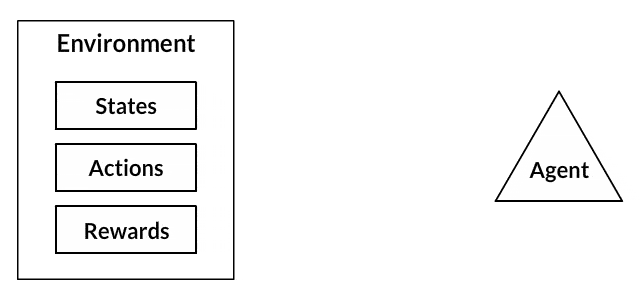

In a way, Reinforcement Learning is the science of making optimal decisions using experiences. Breaking it down, the process of Reinforcement Learning involves these simple steps:

- Observation of the environment
- Deciding how to act using some strategy
- Acting accordingly
- Receiving a reward or penalty
- Learning from the experiences and refining our strategy
- Iterate until an optimal strategy is found

## Gym Interface

In [15]:
import gym
import gym_anytrading

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


### anytrading

`AnyTrading` is a collection of OpenAI Gym environments for reinforcement learning-based trading algorithms.

Trading algorithms are mostly implemented in two markets: FOREX and Stock. AnyTrading aims to provide some Gym environments to improve and facilitate the procedure of developing and testing RL-based algorithms in this area. This purpose is obtained by implementing three Gym environments: TradingEnv, ForexEnv, and StocksEnv.

TradingEnv is an abstract environment which is defined to support all kinds of trading environments. ForexEnv and StocksEnv are simply two environments that inherit and extend TradingEnv. In the future sections, more explanations will be given about them but before that, some environment properties should be discussed.

First of all, you can't simply expect an RL agent to do everything for you and just sit back on your chair in such complex trading markets! Things need to be simplified as much as possible in order to let the agent learn in a faster and more efficient way. In all trading algorithms, the first thing that should be done is to define actions and positions. In the two following subsections, I will explain these actions and positions and how to simplify them.

### Create an environment

The core gym interface is env, which is the unified environment interface. 

let's creating interface using `.make()` fuction

In [2]:
from gym_anytrading.datasets import STOCKS_GOOGL

custom_env = gym.make('stocks-v0',
               df = STOCKS_GOOGL,
               window_size = 10,
               frame_bound = (10, 300))

The following are the env methods that would be quite helpful to us:

- env.reset: Resets the environment and returns a random initial state.
- env.render: Renders one frame of the environment (helpful in visualizing the environment)

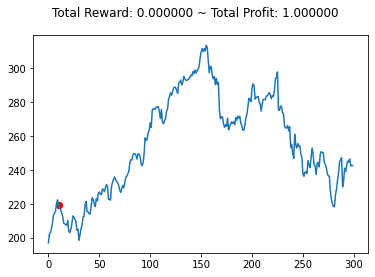

In [22]:
custom_env.reset()
custom_env.render()

If you're not familiar with trading positions

In a simple vision: Long position wants to buy shares when prices are low and profit by sticking with them while their value is going up, and Short position wants to sell shares with high value and use this value to buy shares at a lower value, keeping the difference as profit.

Again, in some trading algorithms, you may find numerous positions such as Short, Long, Flat, etc. As discussed earlier, I use only Short=0 and Long=1 positions.

info: {'total_reward': 4.649659999999784, 'total_profit': 0.3558402547855201, 'position': 0}


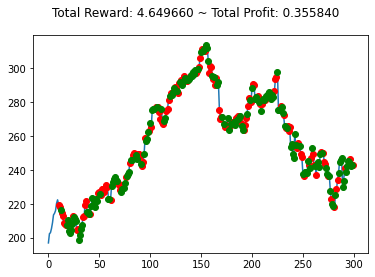

In [4]:
observation = custom_env.reset()
while True:
    action = custom_env.action_space.sample()
    observation, reward, done, info = custom_env.step(action)

    if done:
        print("info:", info)
        break

plt.cla()
custom_env.render_all()
plt.show()

You can use render_all method to avoid rendering on each step and prevent time-wasting.

As you see, the first 10 points (window_size=10) on the plot don't have a position. Because they aren't involved in calculating reward, profit, etc. They just display the first observations. So the environment's _start_tick and initial _last_trade_tick are 10 and 9.

##  Advantage Actor Critic (A2C)

In the field of Reinforcement Learning, the Advantage Actor Critic (A2C) algorithm combines two types of Reinforcement Learning algorithms (Policy Based and Value Based) together. Policy Based agents directly learn a policy (a probability distribution of actions) mapping input states to output actions. Value Based algorithms learn to select actions based on the predicted value of the input state or action. 

### The Advantage Actor-Critic Algorithm Overview

The actor critic algorithm consists of two networks (the actor and the critic) working together to solve a particular problem. At a high level, the Advantage Function calculates the agent’s TD Error or Prediction Error. The actor network chooses an action at each time step and the critic network evaluates the quality or the Q-value of a given input state. As the critic network learns which states are better or worse, the actor uses this information to teach the agent to seek out good states and avoid bad states.

### The Advantage Function
What’s the advantage function? Considering that “Advantage” is in the Advantage Actor Critic algorithm’s name, it must be pretty important. In order to understand what the Advantage Function is, we first need to understand how to calculate the TD Error, or the Temporal Difference Error.

In Temporal Difference Learning, agents learn by making predictions about future rewards and adjusting their actions based on prediction error. One of the reasons Temporal Difference Learning is quite interesting is that prediction error also seems to be one of the ways that the brain learns new things.

The Advantage function tells us if a state is better or worse than expected. If an action is better than expected (the advantage is greater than 0), we want to encourage the actor to take more of that action. If an action is worse than expected (the advantage is less than 0), we want to encourage the actor to take the opposite of that action. If an action performs exactly as expected (the advantage equals 0), the actor doesn’t learn anything from that action.

###  Actor Network

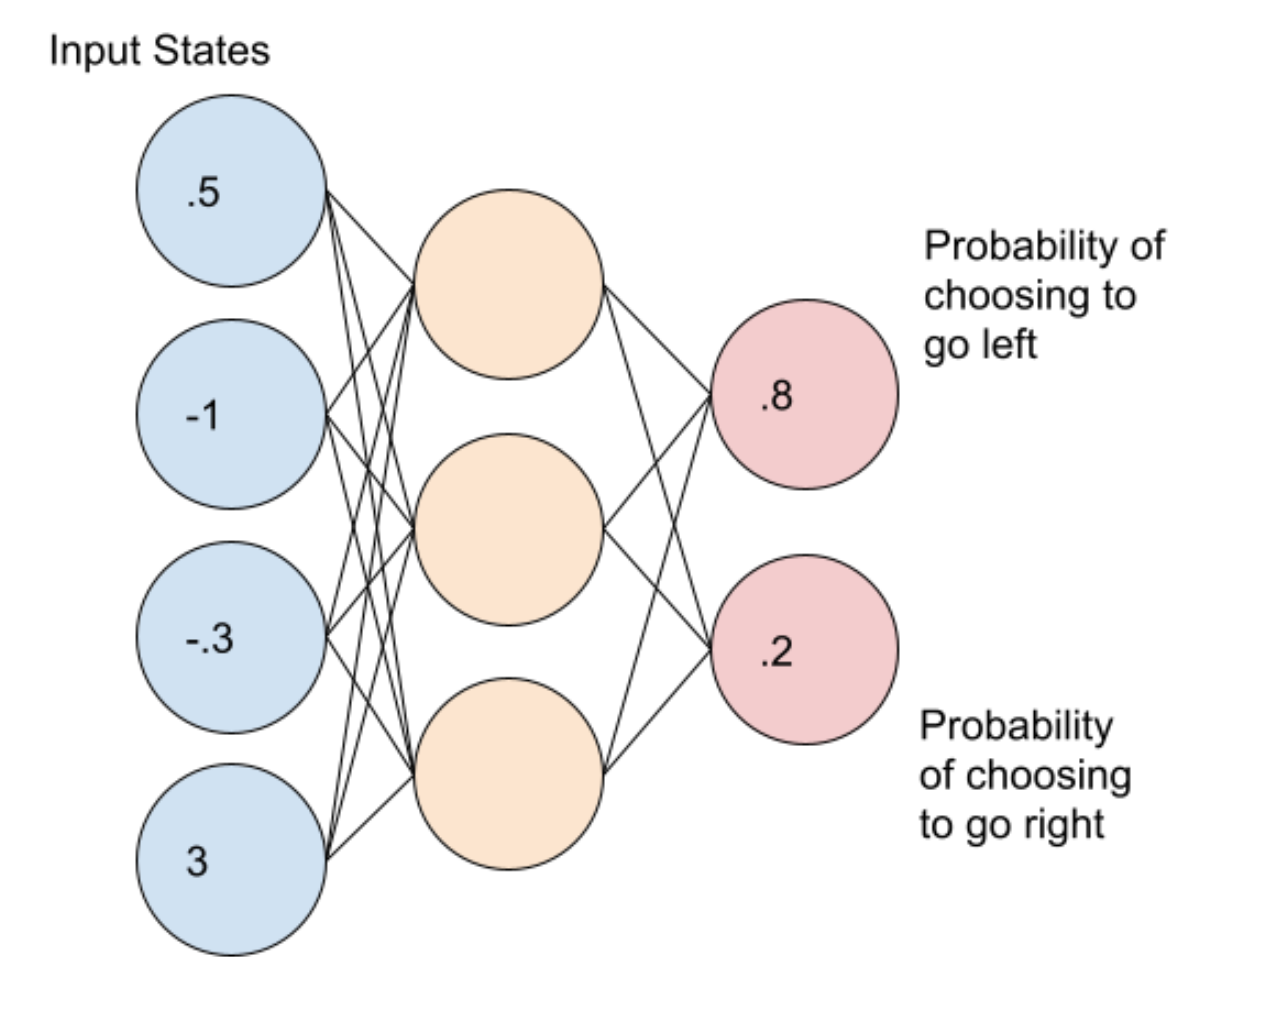

The actor network maps each state to a corresponding action. Just like with the Critic Network, we can update the Actor Network weights after every time step.

The actor network outputs a probability distribution corresponding to each action. We sample actions from this probability distribution according to each action’s probability. If the action to go left has a value of .8 and the action to go right has a value of .2, we will only choose the left action 80% of the time and the right action 20% of the time. Because the output is a probability distribution, note that the agent will not always choose the action with the highest probability.

### Critic Network

The critic network maps each state to its corresponding Q-value. The Q-value represents the value of a state where Q represents the Quality of the state.



Unlike the Actor Network which outputs a probability distribution of actions, the Critic Network outputs the TD Target of the input state as a floating point number. In the figure above, the critic network evaluates the input state to have a Q-value of 15.



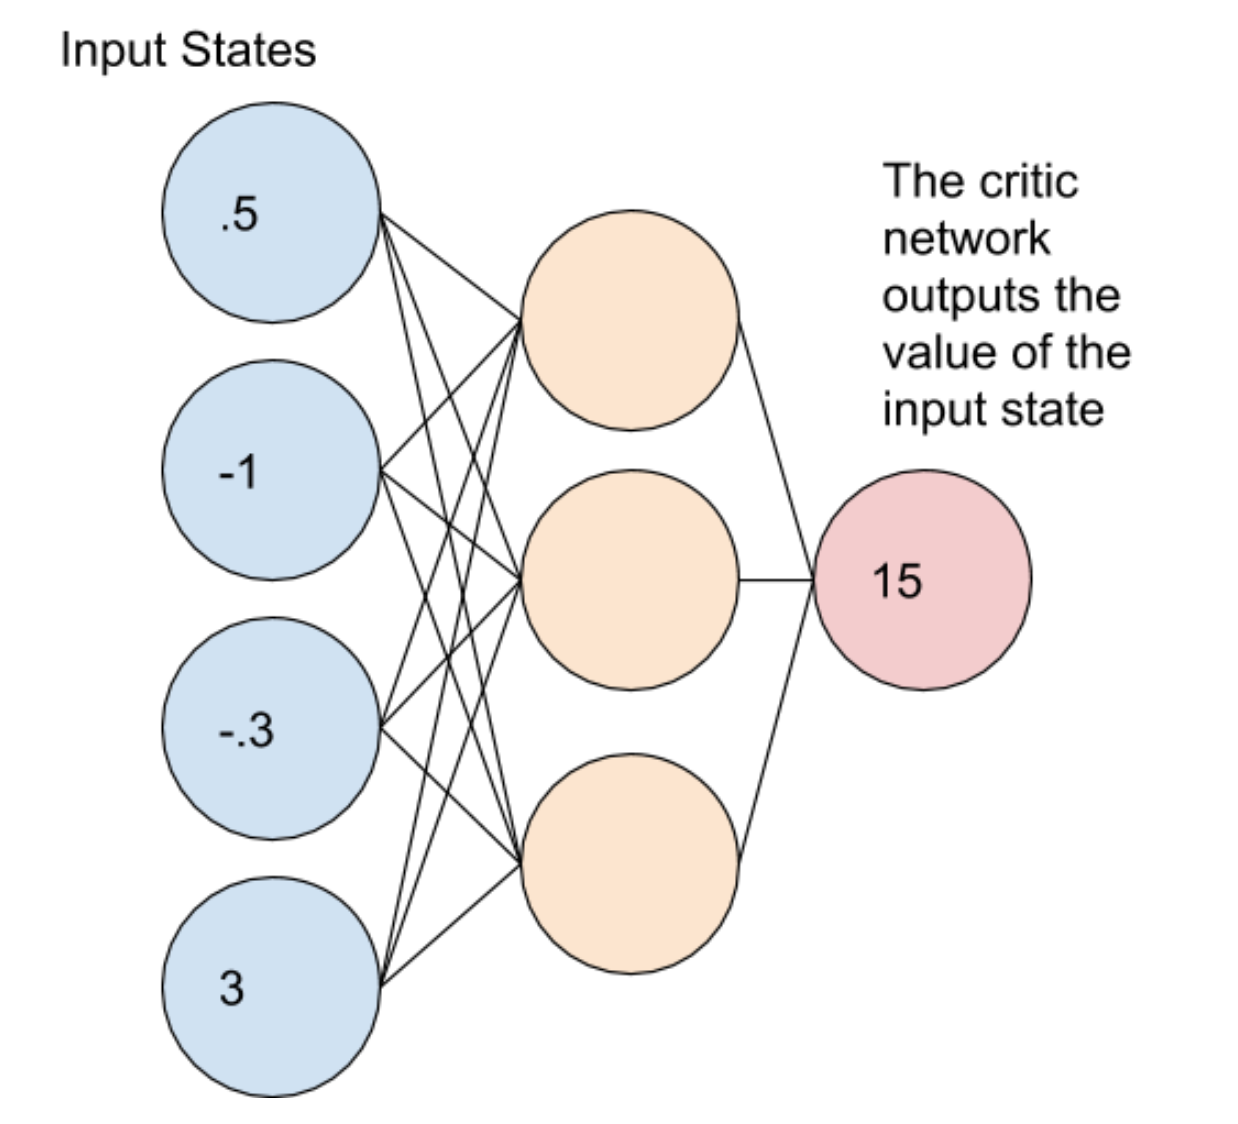

As the agent explores its environment, the critic network is attempting to drive the advantage function to 0. At the beginning of the learning process, the critic will likely make large errors causing the calculated TD error to be quite incorrect. Because the algorithm starts out with the critic having no knowledge of the environment, the actor similarly can’t learn much from the critic. As the critic starts to make more and more accurate predictions, the calculated TD error (Advantage) becomes more accurate. The actor is able to learn from the increasingly accurate TD error to decide if a move was good or bad.

now we will create new envrovement. 

In [18]:
df = gym_anytrading.datasets.STOCKS_GOOGL.copy()

window_size = 100
start_index = window_size
end_index = len(df)

env_maker = lambda: gym.make(
    'stocks-v0',
    df = df,
    window_size = window_size,
    frame_bound = (start_index, end_index)
)

env = DummyVecEnv([env_maker])

### Training Envirovement

In [19]:
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

policy_kwargs = dict(net_arch=[64, dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model.learn(total_timesteps=1000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 780      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.625   |
|    explained_variance | 5.96e-08 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.13     |
|    value_loss         | 5.46     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 765      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.689   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.785   |
|    value_loss      

- env.step(action): Step the environment by one timestep. Returns

    - observation: Observations of the environment
    - reward: If your action was beneficial or not
    - done: Indicates if we have successfully picked up and dropped off a passenger, also called one episode
    - info: Additional info such as performance and latency for debugging purposes

### Test our model

In [20]:
env = env_maker()
observation = env.reset()

while True:
    observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
    observation, reward, done, info = env.step(action)

    # env.render()
    if done:
        print("info:", info)
        break

info: {'total_reward': 688.2727139999994, 'total_profit': 0.0006119807144303312, 'position': 1}


### Plot the result

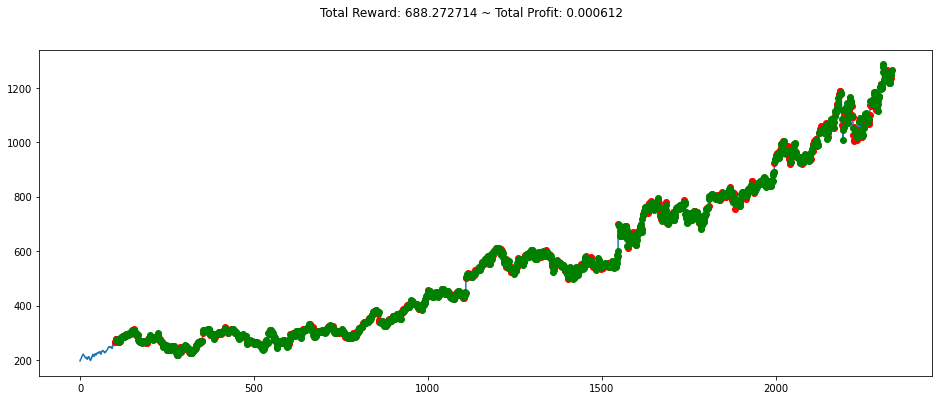

In [21]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()